In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import matplotlib 
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

In [3]:
!pwd

/Users/phanivalasa/Documents/Columbia/Capstone/Notebooks


In [6]:
pd_train = pd.read_csv('/Users/phanivalasa/Documents/Columbia/Capstone/github/tweet-url-relationships/data/temp/sampling_blind/latest/articles_train.csv')
pd_test = pd.read_csv('/Users/phanivalasa/Documents/Columbia/Capstone/github/tweet-url-relationships/data/temp/sampling_blind/latest/articles_test.csv')


In [17]:
# text_train, text_test, y_train, y_test = train_test_split(df_article_blind_ratings_dataset['content_body_clean'], 
#                                                     df_article_blind_ratings_dataset['rating_scale_response'], 
#                                                     random_state=0)

In [10]:
rating_train.head()

0    3.177778
1    2.375000
2    3.916667
3    2.100000
4    2.428571
Name: blind_mean_rating, dtype: float64

In [19]:
text_train = pd_train['content_body_clean']
rating_train = pd_train['blind_mean_rating']
y_train = np.array(rating_train/5)

text_test = pd_test['content_body_clean']
rating_test = pd_test['blind_mean_rating']
y_test = np.array(rating_test/5)


In [20]:
vect = TfidfVectorizer().fit(text_train) #bag of words fitted on training texts

X_train = vect.transform(text_train)  # Create sparse vector that represents training text data

X_test = vect.transform(text_test) # Create sparse vector that represents test text data based on same bag of words

In [21]:
repr(X_train)

"<1301x31516 sparse matrix of type '<class 'numpy.float64'>'\n\twith 436538 stored elements in Compressed Sparse Row format>"

In [22]:
X_train[0]


<1x31516 sparse matrix of type '<class 'numpy.float64'>'
	with 189 stored elements in Compressed Sparse Row format>

In [23]:
y_train.shape

(1301,)

In [24]:
type(y_train)

numpy.ndarray

In [25]:
model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)


0.009965122136737614

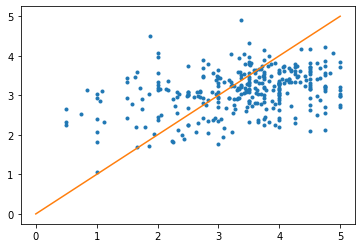

In [27]:
### Fit on test data

y_pred = model.predict(X_test) 
plt.plot(y_test*5, y_pred*5, '.')

# # plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 5)
y = x
plt.plot(x, y)
plt.show()

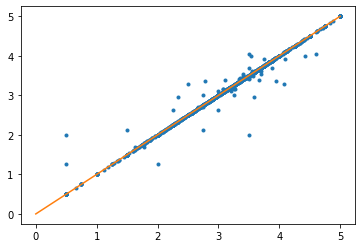

In [28]:
### Fit on training data

y_pred = model.predict(X_train) 
plt.plot(y_train*5, y_pred*5, '.')

# # plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 5)
y = x
plt.plot(x, y)
plt.show()